<a href="https://colab.research.google.com/github/yeiscop/PYTHON/blob/master/YOLOv3_colab_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Oct 22 19:14:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
checkpoints		  IMAGES	     README.md
Collect_training_data.py  LICENSE	     requirements.txt
custom_dataset		  log		     tools
deep_sort		  mAP		     train.py
detection_custom.py	  mnist		     yolov3
detection_demo.py	  model_data	     YOLOv3_colab_training.ipynb
detect_mnist.py		  object_tracker.py
evaluate_mAP.py		  __pycache__


**Install all required libraries for our project:**

In [5]:
!pip install -r ./requirements.txt

**Download yolov3.weights if you don't have it:**

In [ ]:
#!wget -P model_data https://pjreddie.com/media/files/yolov3.weights
#Puede toamr media hora la descarga de los pesos previamente entrebados con el dataset de COCO

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [6]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

**Test by loading trained model:**

In [7]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

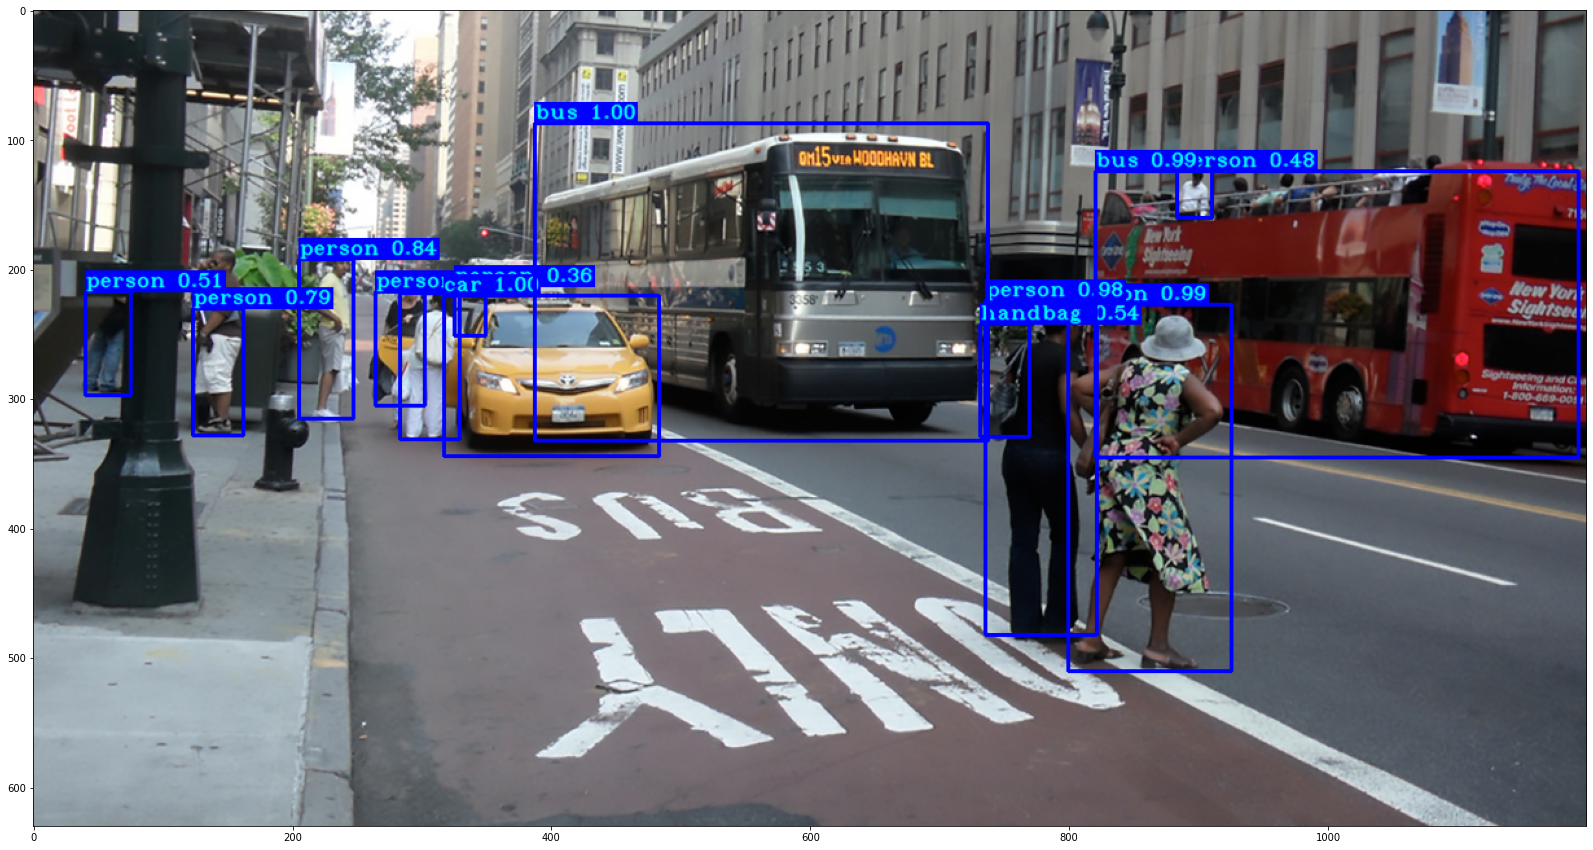

In [8]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

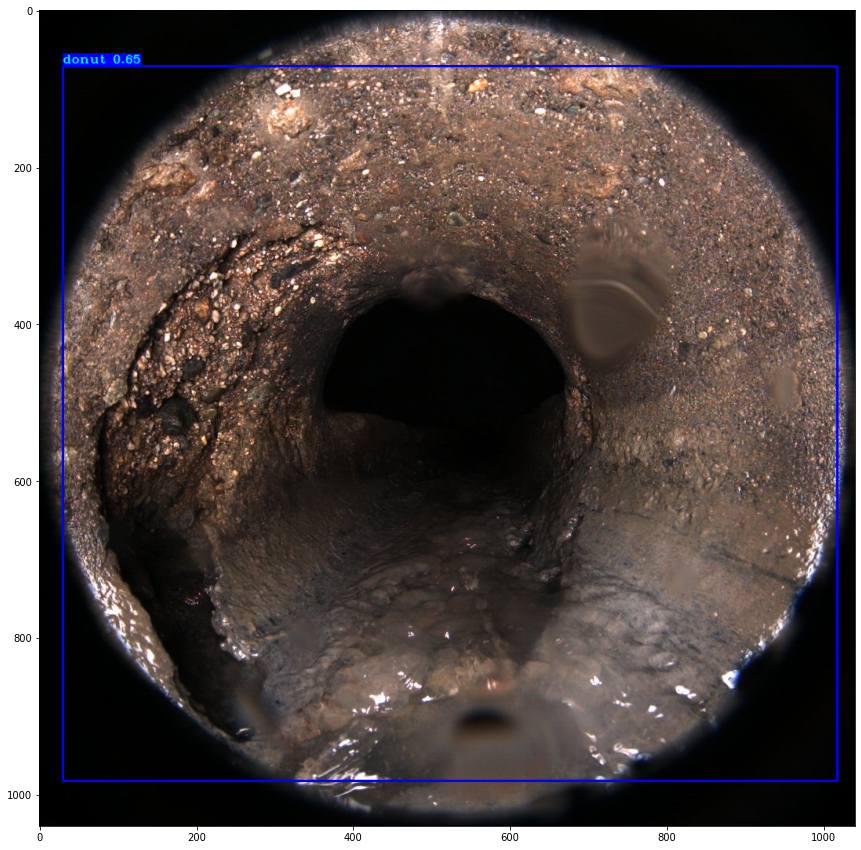

In [9]:
image_path   = "./IMAGES/Front303.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [93]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=119.jpg 160,413,253,440,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=120.jpg 311,376,375,395,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=171.jpg 823,378,907,401,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=165.jpg 1071,381,1171,407,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=189.jpg 947,369,1018,389,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=148.jpg 631,348,695,368,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=154.jpg 552,331,600,346,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=186.jpg 932

**Start training custom model:**

In [94]:
from train import *
tf.keras.backend.clear_session()
main()

GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/29, lr:0.000003, giou_loss:   3.19, conf_loss:2167.26, prob_loss:   8.01, total_loss:2178.46
epoch: 0 step:    3/29, lr:0.000005, giou_loss:   3.54, conf_loss:1573.50, prob_loss:   8.48, total_loss:1585.52
epoch: 0 step:    4/29, lr:0.000007, giou_loss:   6.71, conf_loss:1581.87, prob_loss:  16.79, total_loss:1605.37
epoch: 0 step:    5/29, lr:0.000009, giou_loss:   3.66, conf_loss:1567.98, prob_loss:   9.57, total_loss:1581.21
epoch: 0 step:    6/29, lr:0.000010, giou_loss:   1.61, conf_loss:1549.50, prob_loss:   4.99, total_loss:1556.11
epoch: 0 step:    7/29, lr:0.000012, giou_loss:   6.32, conf_loss:1543.11, prob_loss:  16.66, total_loss:1566.09
epoch: 0 step:    8/29, lr:0.000014, giou_loss:   1.62, conf_loss:1526.51, prob_loss:   3.15, total_loss:1531.28
epoch: 0 step:    9/29, lr:0.000016, giou_loss:   3.14, conf_loss:1514.21, prob_

**Create Yolo v3 custom model and load custom trained weights**

In [95]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

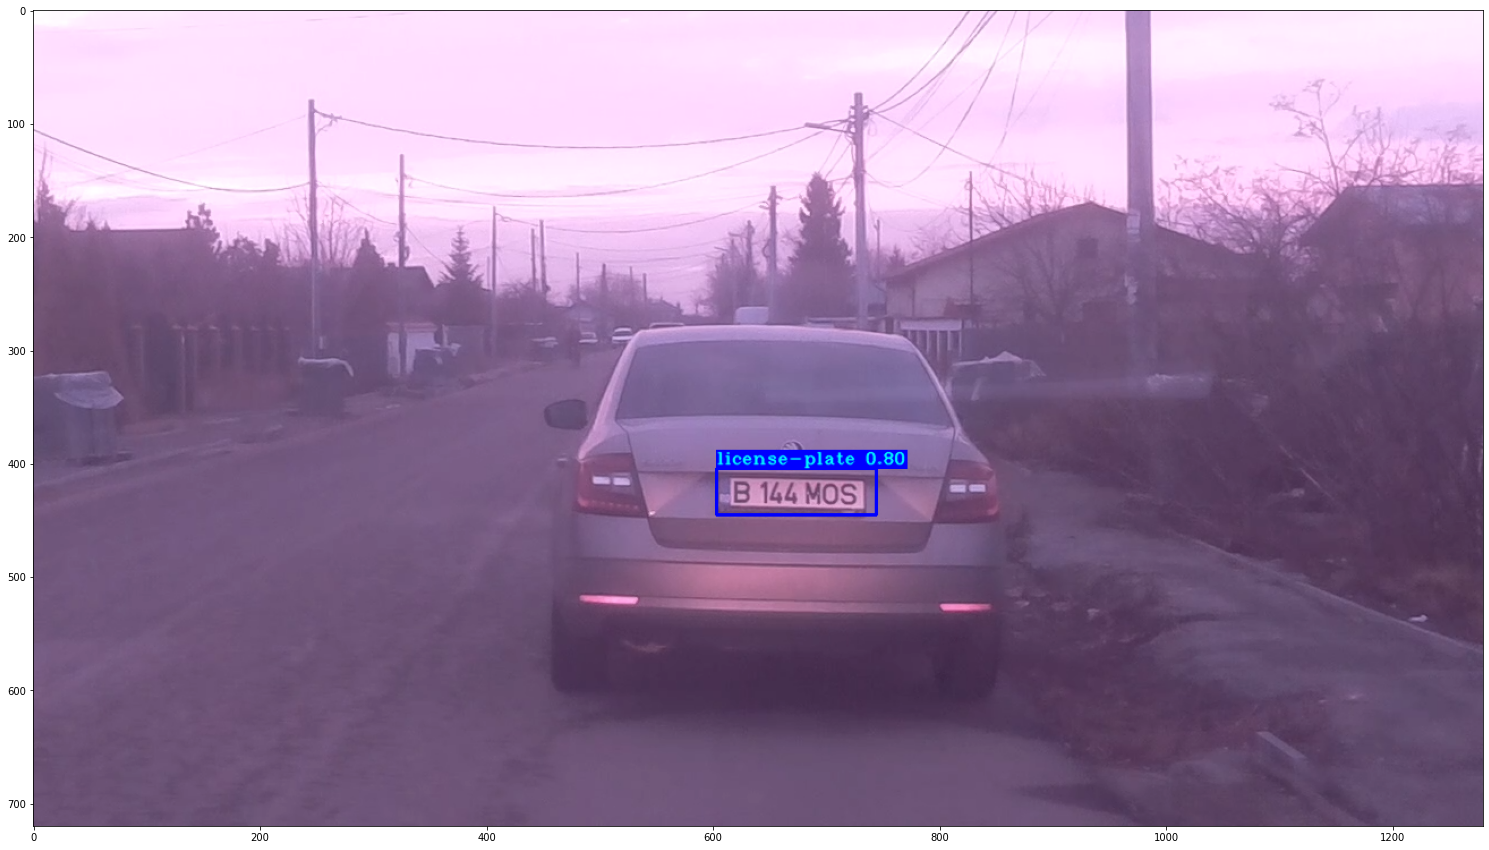

In [96]:
image_path   = "./IMAGES/PLATE1.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**

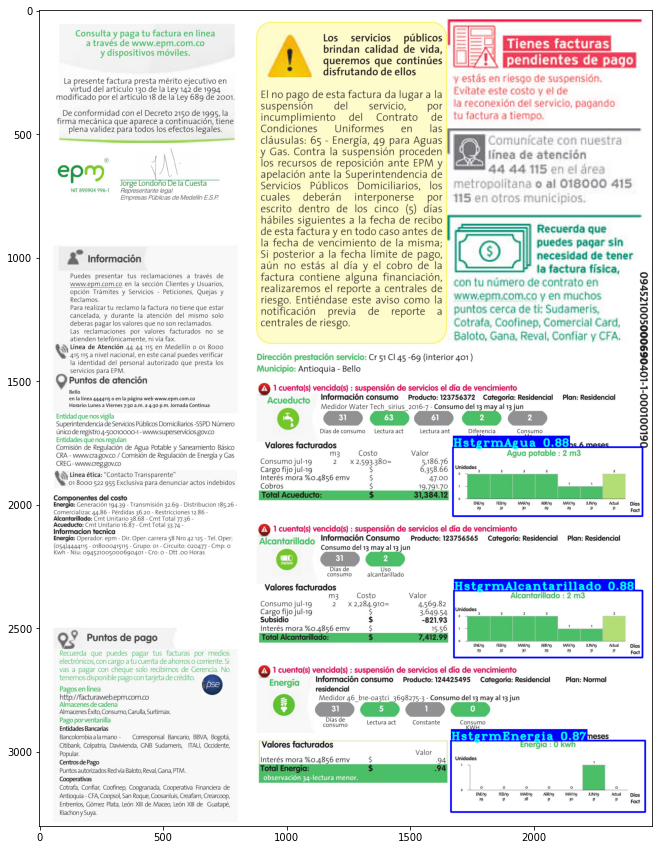

In [97]:
image_path   = "./IMAGES/FACTURA.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

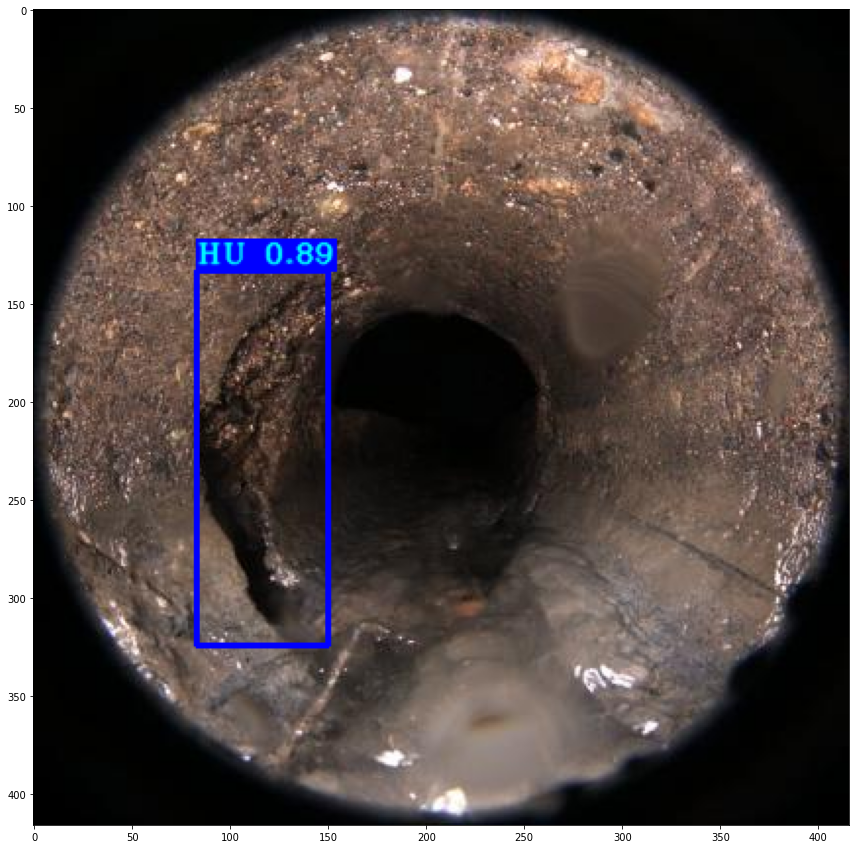

In [99]:
image_path   = "./IMAGES/HUECO.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)